In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(101)
tf.random.set_seed(101)

# Generating random linear data
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

# Normalize the data
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)

x = (x - x_mean) / x_std
y = (y - y_mean) / y_std

n = len(x)  # Number of data points

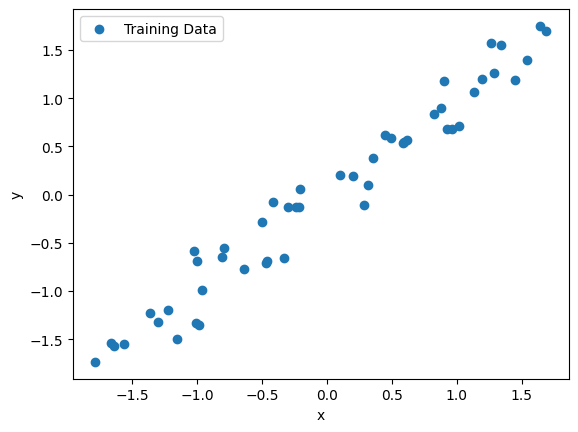

In [3]:
# Step 1: Plot the training data
plt.scatter(x, y, label="Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
# Step 2: Create placeholders for X and Y 
X = tf.constant(x, dtype=tf.float32)
Y = tf.constant(y, dtype=tf.float32)

In [5]:
# Step 3: Initialize trainable variables for weights and bias
W = tf.Variable(np.random.randn() * 0.01, name="weight", dtype=tf.float32)
b = tf.Variable(np.random.randn() * 0.01, name="bias", dtype=tf.float32)

In [10]:
# Step 4: Define hyperparameters
learning_rate = 0.01  
training_epochs = 1000

In [11]:
# Step 5: Define the hypothesis, cost function, and optimizer
def linear_model(X):
    return W * X + b

def cost_function(X, Y):
    predictions = linear_model(X)
    return tf.reduce_mean(tf.square(predictions - Y))

optimizer = tf.optimizers.SGD(learning_rate)

In [12]:
# Step 6: Training process
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        cost = cost_function(X, Y)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}, Cost: {cost.numpy()}, Weight: {W.numpy()}, Bias: {b.numpy()}")

Epoch 100, Cost: 0.04198507219552994, Weight: 0.9612268209457397, Bias: 0.0002315614401595667
Epoch 200, Cost: 0.04166373237967491, Weight: 0.9765990972518921, Bias: 3.070849925279617e-05
Epoch 300, Cost: 0.04165808856487274, Weight: 0.9786376953125, Bias: 4.073560376127716e-06
Epoch 400, Cost: 0.041657980531454086, Weight: 0.978908121585846, Bias: 5.40635710422066e-07
Epoch 500, Cost: 0.04165797680616379, Weight: 0.9789438843727112, Bias: 7.076492636315379e-08
Epoch 600, Cost: 0.04165797680616379, Weight: 0.9789479970932007, Bias: 1.462478227409747e-08
Epoch 700, Cost: 0.04165797680616379, Weight: 0.9789479970932007, Bias: -1.9713723986569676e-09
Epoch 800, Cost: 0.04165797680616379, Weight: 0.9789479970932007, Bias: -1.5028529531946333e-08
Epoch 900, Cost: 0.04165797680616379, Weight: 0.9789479970932007, Bias: -1.5028529531946333e-08
Epoch 1000, Cost: 0.04165797680616379, Weight: 0.9789479970932007, Bias: -1.5028529531946333e-08



Training complete!
Final Cost: 0.04165797680616379
Weight: 0.9789479970932007
Bias: -1.5028529531946333e-08


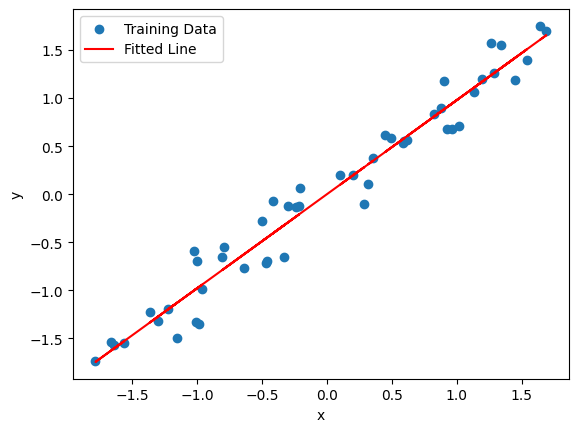

In [13]:
# Final results
print("\nTraining complete!")
print(f"Final Cost: {cost.numpy()}")
print(f"Weight: {W.numpy()}")
print(f"Bias: {b.numpy()}")

# Step 7: Plot the fitted line
plt.scatter(x, y, label="Training Data")
plt.plot(x, linear_model(X).numpy(), color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()